<a href="https://colab.research.google.com/github/vachkim/BOOK/blob/master/%EB%AA%A8%EB%91%90%EC%9D%98%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D/BOOK_POPULATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. 인구공공데이터 가져오기
- [행정안전부](https://www.mois.go.kr/frt/a01/frtMain.do)의 정책자료-통계-주민등록 인구통계에서 필요한 데이터를 가져온다
- CSV로 파일을 다운 받은 뒤 드라이브에 저장한다
- 본인은 0-100세 사이의 연령별 인구수를 가져왔다

### 2. 구글드라이브에서 데이터 가져오기
- 업로드한 파일을 드라이브에서 옮겨온다

In [ ]:
from google.colab import drive
ROOT = '/content/drive'
drive.mount(ROOT)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
%cd drive/'My Drive'/'Colab Notebooks'/'모두의 데이터 분석'

/content/drive/My Drive/Colab Notebooks/모두의 데이터 분석


In [ ]:
%ls

기온데이터.csv  인구데이터.csv


In [ ]:
import pandas as pd
pop = pd.read_csv('인구데이터.csv', encoding='cp949')

- 데이터 정보를 보면 0-100세 사이의 연령대와 그에 따른 인구수가 나타나 있음을 알 수 있다

In [ ]:
print(pop.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3827 entries, 0 to 3826
Columns: 104 entries, 행정구역 to 2020년08월_계_100세 이상
dtypes: object(104)
memory usage: 3.0+ MB
None


In [ ]:
print(pop.columns)

Index(['행정구역', '2020년08월_계_총인구수', '2020년08월_계_연령구간인구수', '2020년08월_계_0세',
       '2020년08월_계_1세', '2020년08월_계_2세', '2020년08월_계_3세', '2020년08월_계_4세',
       '2020년08월_계_5세', '2020년08월_계_6세',
       ...
       '2020년08월_계_91세', '2020년08월_계_92세', '2020년08월_계_93세', '2020년08월_계_94세',
       '2020년08월_계_95세', '2020년08월_계_96세', '2020년08월_계_97세', '2020년08월_계_98세',
       '2020년08월_계_99세', '2020년08월_계_100세 이상'],
      dtype='object', length=104)


In [ ]:
print(pop.head(3))

                          행정구역  ... 2020년08월_계_100세 이상
0          서울특별시  (1100000000)  ...              6,632
1       서울특별시 종로구 (1111000000)  ...                270
2  서울특별시 종로구 청운효자동(1111051500)  ...                 19

[3 rows x 104 columns]


### 3. 데이터 시각화
- 금천구 독산3동의 인구정보만을 가져와 시각화를 진행한다
- 행정구역에서 독산3동의 정보를 찾고 싶으면 아래와 같이 진행하면 된다

In [ ]:
for i, con in enumerate(pop['행정구역']):
  if '독산제3동' in con:
    doksan = pop.iloc[i,3:] #3열부터 연령별 인구정보가 담겨있다
    print(doksan) 

2020년08월_계_0세          70
2020년08월_계_1세          93
2020년08월_계_2세          95
2020년08월_계_3세         113
2020년08월_계_4세         116
                     ... 
2020년08월_계_96세          7
2020년08월_계_97세          3
2020년08월_계_98세          4
2020년08월_계_99세          0
2020년08월_계_100세 이상     23
Name: 298, Length: 101, dtype: object


- 여기에서 각 연령별 인구수는 object타입으로 저장되어 있다
- 따라서 이를 시각화하기 위해서는 숫자타입으로 변경해줄 필요가 있다

In [ ]:
age = []
for item in doksan:
  age.append(float(item))
print(age)

[70.0, 93.0, 95.0, 113.0, 116.0, 111.0, 104.0, 109.0, 131.0, 112.0, 104.0, 104.0, 113.0, 141.0, 121.0, 141.0, 128.0, 181.0, 166.0, 203.0, 261.0, 237.0, 292.0, 387.0, 387.0, 407.0, 489.0, 492.0, 476.0, 439.0, 413.0, 385.0, 352.0, 360.0, 341.0, 321.0, 312.0, 318.0, 376.0, 315.0, 312.0, 311.0, 278.0, 261.0, 268.0, 313.0, 366.0, 399.0, 402.0, 439.0, 436.0, 513.0, 479.0, 449.0, 494.0, 505.0, 487.0, 525.0, 452.0, 556.0, 554.0, 462.0, 454.0, 401.0, 375.0, 400.0, 340.0, 300.0, 283.0, 240.0, 275.0, 251.0, 231.0, 226.0, 161.0, 164.0, 163.0, 177.0, 152.0, 152.0, 131.0, 122.0, 91.0, 68.0, 61.0, 65.0, 51.0, 45.0, 30.0, 31.0, 25.0, 17.0, 16.0, 15.0, 11.0, 5.0, 7.0, 3.0, 4.0, 0.0, 23.0]


- 저장된 연령별 정보를 바탕으로 도표를 그려보자

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

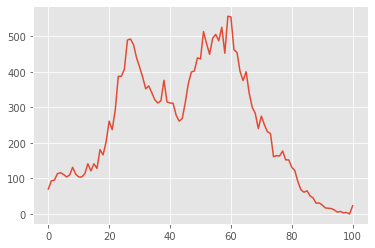

In [ ]:
plt.style.use('ggplot') # ggplot은 격자무늬로 도표를 그린다
plt.plot(age)
plt.show()

- 위 결과를 리스트 형식의 데이터셋으로 다루면 다음과 같이 코딩할 수 있다
``` python
import csv
f = open('age.csv')
data = csv.reader(f)
result = []
for row in data:
  if '독산제3동' in row[0]:
    for i in row[3:]:
      result.append(i)
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.plot(result)
plt.show()
```